In [1]:
import Labber
import numpy as np
import matplotlib.pyplot as plt
import os
from fitTools.utilities import Watt2dBm, dBm2Watt, VNA2dBm

# First looking at a power, frequency, and flux sweep of JPA to find max SNR

In [4]:
JPA0211 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0211\NBR07-8_JPA_SNR_p_freq_flux_sweep.hdf5"

In [6]:
lf = Labber.LogFile(JPA0211)
sig = lf.getData(name = 'SA - Signal')
linsig = dBm2Watt(sig)
# linsig = np.mean(linsig,axis = 0)

power = lf.getData(name = 'JPA pump - Power')
curr = lf.getData(name = 'JPA flux - Source current')
freq = lf.getData(name = 'JPA pump - Frequency')

In [7]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [19]:
freq.shape

(26, 26, 16)

In [14]:
freq = np.reshape(freq, (26,26,16))

In [15]:
power = np.reshape(power, (26,26,16))

In [16]:
curr = np.reshape(curr, (26,26,16))

In [17]:
signal = np.reshape(linsig, (26,26,16,401))

In [21]:
snr = np.zeros((26,26,16))
noise = np.zeros((26,26,16))
for i in range(26):
    for j in range(26):
        for k in range(16):
            max_ind=np.argmax(signal[i,j,k,:])
            max_val=np.max(signal[i,j,k,:])
            mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
#             noisetemp=np.append(linsignal[i,j,k,:max_ind-75],linsignal[i,j,k,max_ind+75:])
            noisetemp = signal[i,j,k,mask]
            avg_noise=np.mean(noisetemp)
            snr[i][j][k] = Watt2dBm(max_val)-Watt2dBm(avg_noise)
            noise[i][j][k] = Watt2dBm(avg_noise)

In [22]:
snr[0][0][0]

10.724460330698761

In [23]:
np.max(snr)

19.43179780338903

In [24]:
ind_max_snr = np.unravel_index(np.argmax(snr, axis=None), snr.shape)

In [25]:
ind_max_snr

(2, 5, 6)

In [26]:
power[ind_max_snr]

-4.0

In [27]:
curr[ind_max_snr]*10**3

4.890000000000001

In [28]:
freq[ind_max_snr]*10**-9

4.2860000000000005

In [29]:
def nlargest_indices(arr, n):
    uniques = np.unique(arr)
    threshold = uniques[-n]
    return np.where(arr >= threshold)

def nsmallest_indices(arr, n):
    uniques = np.unique(arr)
    threshold = uniques[-n]
    return np.where(arr <= threshold)

In [33]:
ind1,ind2,ind3 = nlargest_indices(snr,10)

In [34]:
inds = nlargest_indices(snr,10)

In [35]:
snr[inds]

array([18.30345232, 18.26095152, 18.9253819 , 19.4317978 , 19.06159173,
       18.977576  , 18.39743266, 18.71192896, 18.87944417, 18.76654563])

In [36]:
noise[inds]

array([-67.12345232, -68.64095152, -67.6753819 , -66.2817978 ,
       -67.10159173, -64.517576  , -64.61743266, -67.86192896,
       -66.68944417, -64.96654563])

In [37]:
for i in range(len(ind1)):
    print('SNR = ', snr[ind1[i]][ind2[i]][ind3[i]])
    print('Noise = ', noise[ind1[i]][ind2[i]][ind3[i]])
    print('Pump Power = ', power[ind1[i]][ind2[i]][ind3[i]], ' dBm')
    print('Pump Frequency = ', freq[ind1[i]][ind2[i]][ind3[i]]*10**-9, ' GHz')
    print('Lisa Current = ', curr[ind1[i]][ind2[i]][ind3[i]]*10**3, ' mA \n')

SNR =  18.303452319901297
Noise =  -67.12345231990129
Pump Power =  -5.0  dBm
Pump Frequency =  4.282  GHz
Lisa Current =  4.8500000000000005  mA 

SNR =  18.26095152017347
Noise =  -68.64095152017347
Pump Power =  -4.0  dBm
Pump Frequency =  4.2860000000000005  GHz
Lisa Current =  4.8500000000000005  mA 

SNR =  18.925381903507287
Noise =  -67.67538190350729
Pump Power =  -4.0  dBm
Pump Frequency =  4.2860000000000005  GHz
Lisa Current =  4.87  mA 

SNR =  19.43179780338903
Noise =  -66.28179780338904
Pump Power =  -4.0  dBm
Pump Frequency =  4.2860000000000005  GHz
Lisa Current =  4.890000000000001  mA 

SNR =  19.061591727494047
Noise =  -67.10159172749405
Pump Power =  -4.0  dBm
Pump Frequency =  4.284000000000001  GHz
Lisa Current =  4.91  mA 

SNR =  18.97757599904351
Noise =  -64.51757599904352
Pump Power =  -4.0  dBm
Pump Frequency =  4.2860000000000005  GHz
Lisa Current =  4.91  mA 

SNR =  18.397432659039268
Noise =  -64.61743265903927
Pump Power =  -4.0  dBm
Pump Frequency =

# Now let's look at JPA flux

In [39]:
JPAflux1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0213\NBR07-8_JPA_SNR_flux_sweep.hdf5"

In [40]:
lf = Labber.LogFile(JPAflux)
sig = lf.getData(name = 'SA - Signal')

In [41]:
linsig = dBm2Watt(sig)
# linsig.shape
linsig = np.mean(linsig.reshape(101,4,401),axis = 1)

In [42]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [43]:
flux = lf.getData(name = 'JPA flux - Source current')
print(flux.shape)

(101, 4)


In [44]:
flux = np.squeeze(flux)
flux = flux[:,0]

In [45]:
SNR = []
MAX = []
NOISE = []
for i in range(len(flux)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

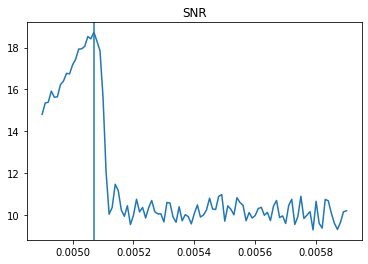

In [49]:
plt.plot(flux,SNR)
plt.title('SNR')
plt.axvline(5.07e-3)

# JPA frequency 

In [50]:
JPAfreq1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0213\NBR07-8_JPA_SNR_freq_sweep.hdf5"

In [51]:
lf = Labber.LogFile(JPAfreq1)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)

In [52]:
linsig = np.mean(linsig.reshape(81,4,401),axis = 1)

In [53]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [54]:
freq = lf.getData(name = 'JPA pump - Frequency')
print(freq.shape)
freq = np.squeeze(freq)

(81, 4)


In [55]:
SNR = []
MAX = []
NOISE = []
for i in range(len(freq)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

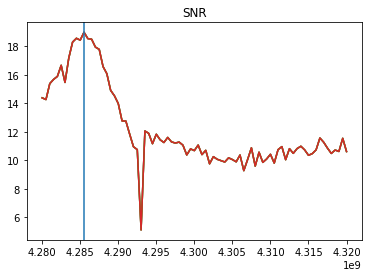

In [58]:
plt.plot(freq,SNR)
plt.title('SNR')
plt.axvline(4.2855e9)

# JPA power

In [59]:
JPApower1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0213\NBR07-8_JPA_SNR_power_sweep.hdf5"

In [60]:
lf = Labber.LogFile(JPApower1)
sig = lf.getData(name = 'SA - Signal')
linsig = dBm2Watt(sig)

In [61]:
linsig = np.mean(linsig.reshape(51,4,401),axis = 1)

In [62]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [63]:
power = lf.getData(name = 'JPA pump - Power')
print(power.shape)
power = np.squeeze(power)

(51, 4)


In [64]:
SNR = []
MAX = []
NOISE = []
for i in range(len(power)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

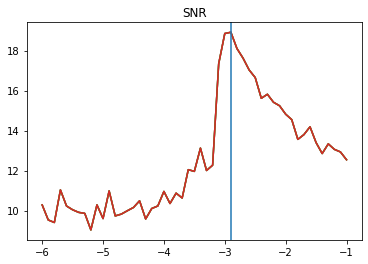

In [67]:
plt.plot(power,SNR)
plt.title('SNR')
plt.axvline(-2.9)

# Repeat the flux sweep

In [68]:
JPAflux2 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0213\NBR07-8_JPA_SNR_flux_sweep_2.hdf5"

In [69]:
lf = Labber.LogFile(JPAflux2)
sig = lf.getData(name = 'SA - Signal')

In [70]:
linsig = dBm2Watt(sig)
# linsig.shape
linsig = np.mean(linsig.reshape(41,4,401),axis = 1)

In [71]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [72]:
flux = lf.getData(name = 'JPA flux - Source current')
print(flux.shape)

(41, 4)


In [73]:
flux = np.squeeze(flux)
flux = flux[:,0]

In [74]:
SNR = []
MAX = []
NOISE = []
for i in range(len(flux)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

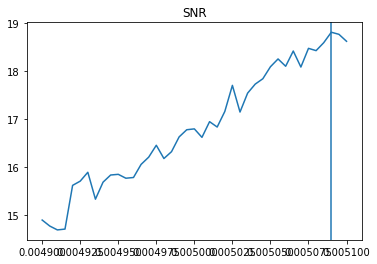

In [76]:
plt.plot(flux,SNR)
plt.title('SNR')
plt.axvline(5.09e-3)

# Setting JPA flux at 5.09 mA, JPA pump frequency = 4.2855 GHz at -2.9 dBm
## Sweep TWPA pump frequency and power

In [77]:
TWPA0214 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_TWPA_SNR_p_freq_sweep.hdf5"

In [78]:
lf = Labber.LogFile(TWPA0214)
sig = lf.getData(name = 'SA - Signal')
linsig = dBm2Watt(sig)
# linsig = np.mean(linsig,axis = 0)

power = lf.getData(name = '10002A05 - Power')
freq = lf.getData(name = '10002A05 - Frequency')

In [79]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [80]:
freq.shape

(41, 81)

In [81]:
freq = np.reshape(freq, (41,81))

In [82]:
power = np.reshape(power, (41,81))

In [83]:
signal = np.reshape(linsig, (41,81,401))

In [84]:
snr = np.zeros((41,81))
noise = np.zeros((41,81))
for i in range(41):
    for j in range(81):
        max_ind=np.argmax(signal[i,j,:])
        max_val=np.max(signal[i,j,:])
        mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
#             noisetemp=np.append(linsignal[i,j,k,:max_ind-75],linsignal[i,j,k,max_ind+75:])
        noisetemp = signal[i,j,mask]
        avg_noise=np.mean(noisetemp)
        snr[i][j] = Watt2dBm(max_val)-Watt2dBm(avg_noise)
        noise[i][j] = Watt2dBm(avg_noise)

In [85]:
snr[0][0]

19.373763878345066

In [86]:
np.max(snr)

21.142091754382932

In [87]:
ind_max_snr = np.unravel_index(np.argmax(snr, axis=None), snr.shape)

In [88]:
ind_max_snr

(33, 67)

In [89]:
power[ind_max_snr]

5.699999999999998

In [90]:
freq[ind_max_snr]*10**-9

8.045

In [91]:
def nlargest_indices(arr, n):
    uniques = np.unique(arr)
    threshold = uniques[-n]
    return np.where(arr >= threshold)

def nsmallest_indices(arr, n):
    uniques = np.unique(arr)
    threshold = uniques[-n]
    return np.where(arr <= threshold)

In [92]:
ind1,ind2 = nlargest_indices(snr,10)

In [93]:
inds = nlargest_indices(snr,10)

In [94]:
snr[inds]

array([20.93739607, 20.93708707, 21.08857217, 20.94376288, 21.0937214 ,
       20.95061822, 21.01555699, 21.14209175, 20.96929565, 21.10152019])

In [95]:
noise[inds]

array([-61.70739607, -61.30708707, -58.62857217, -59.53376288,
       -62.4937214 , -59.54061822, -55.90555699, -59.10209175,
       -58.90929565, -58.94152019])

In [97]:
for i in range(len(ind1)):
    print('SNR = ', snr[ind1[i]][ind2[i]])
    print('Noise = ', noise[ind1[i]][ind2[i]])
    print('Pump Power = ', power[ind1[i]][ind2[i]], ' dBm')
    print('Pump Frequency = ', freq[ind1[i]][ind2[i]]*10**-9, ' GHz\n')

SNR =  20.93739607469685
Noise =  -61.707396074696845
Pump Power =  4.999999999999998  dBm
Pump Frequency =  7.880000000000001  GHz

SNR =  20.93708707006342
Noise =  -61.30708707006342
Pump Power =  4.999999999999998  dBm
Pump Frequency =  7.985  GHz

SNR =  21.088572168005598
Noise =  -58.6285721680056
Pump Power =  4.299999999999999  dBm
Pump Frequency =  8.005  GHz

SNR =  20.943762884066146
Noise =  -59.53376288406615
Pump Power =  4.499999999999999  dBm
Pump Frequency =  8.01  GHz

SNR =  21.093721399811336
Noise =  -62.493721399811335
Pump Power =  5.099999999999999  dBm
Pump Frequency =  8.040000000000001  GHz

SNR =  20.950618216019166
Noise =  -59.54061821601917
Pump Power =  5.399999999999999  dBm
Pump Frequency =  8.040000000000001  GHz

SNR =  21.015556991269065
Noise =  -55.905556991269066
Pump Power =  4.599999999999999  dBm
Pump Frequency =  8.045  GHz

SNR =  21.142091754382932
Noise =  -59.10209175438293
Pump Power =  5.699999999999998  dBm
Pump Frequency =  8.045  GH

# TWPA frequency 

In [126]:
TWPAfreq1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_TWPA_SNR_freq_sweep.hdf5" #power 4.3 dBm
TWPAfreq2 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_TWPA_SNR_freq_sweep_2.hdf5" #power 4.9 dBm
TWPAfreq3 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_TWPA_SNR_freq_sweep_3.hdf5" #power 4.6 dBm

In [127]:
lf = Labber.LogFile(TWPAfreq3)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)

In [128]:
linsig = np.mean(linsig.reshape(41,4,401),axis = 1)

In [129]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [130]:
freq = lf.getData(name = '10002A05 - Frequency')
print(freq.shape)
freq = np.squeeze(freq)

(41, 4)


In [131]:
SNR = []
MAX = []
NOISE = []
for i in range(len(freq)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

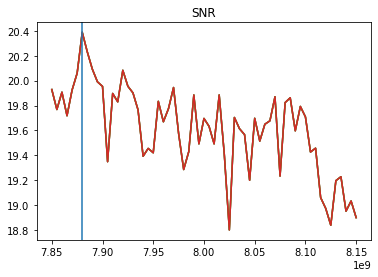

In [107]:
#TWPAfreq1
plt.plot(freq,SNR)
plt.title('SNR')
plt.axvline(7.88e9)

# TWPA power

In [137]:
TWPApower1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_TWPA_SNR_power_sweep.hdf5"
TWPApower2 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_TWPA_SNR_power_sweep_2.hdf5"

In [138]:
lf = Labber.LogFile(TWPApower2)
sig = lf.getData(name = 'SA - Signal')
linsig = dBm2Watt(sig)

In [139]:
linsig = np.mean(linsig.reshape(21,4,401),axis = 1)

In [140]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [141]:
power = lf.getData(name = '10002A05 - Power')
print(power.shape)
power = np.squeeze(power)

(21, 4)


In [142]:
SNR = []
MAX = []
NOISE = []
for i in range(len(power)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

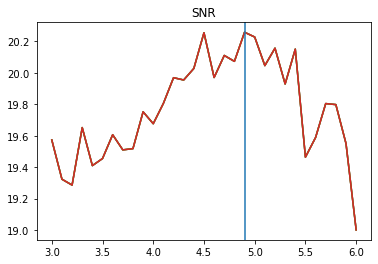

In [116]:
#TWPApower1
plt.plot(power,SNR)
plt.title('SNR')
plt.axvline(4.9)

## Repeat frequency sweep setting the power at 4.9 dBm

In [117]:
TWPAfreq2 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_TWPA_SNR_freq_sweep_2.hdf5"

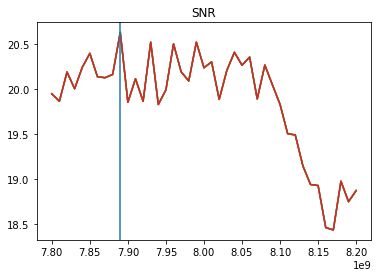

In [125]:
#TWPAfreq2
plt.plot(freq,SNR)
plt.title('SNR')
plt.axvline(7.89e9)

## Repeat frequency sweep setting the power at 4.6 dBm

In [117]:
TWPAfreq3 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_TWPA_SNR_freq_sweep_3.hdf5"

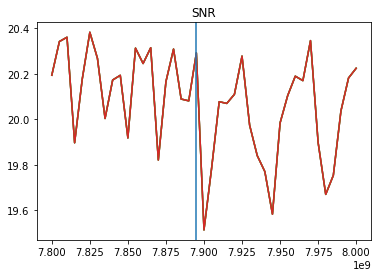

In [133]:
#TWPAfreq3
plt.plot(freq,SNR)
plt.title('SNR')
plt.axvline(7.895e9)

## Repeat power sweep having frequency at 7.89 GHz

In [143]:
TWPApower2 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_TWPA_SNR_power_sweep_2.hdf5"

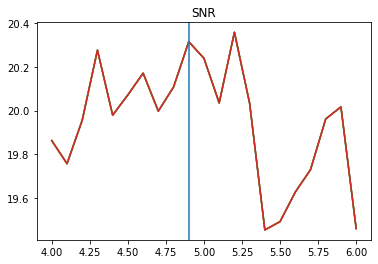

In [144]:
#TWPApower2
plt.plot(power,SNR)
plt.title('SNR')
plt.axvline(4.9)

# SNR check both OFF

In [145]:
bothOFF1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_SNR_bothOFF.hdf5"

In [146]:
lf = Labber.LogFile(bothOFF1)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)
linsig = np.mean(linsig,axis = 0)

In [147]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [148]:
max_ind=np.argmax(linsig)
max_val=np.max(linsig)
mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
noise=linsig[mask]
avg_noise=np.mean(noise)
snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
print("SNR = ", snr)
print("Signal = ", Watt2dBm(max_val))
print("Noise = ", Watt2dBm(avg_noise))

SNR =  10.595569293717809
Signal =  -60.62836282813489
Noise =  -71.2239321218527


# SNR check both ON

In [149]:
bothON1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_SNR_bothON.hdf5"

In [150]:
lf = Labber.LogFile(bothON1)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)
linsig = np.mean(linsig,axis = 0)

In [151]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [152]:
max_ind=np.argmax(linsig)
max_val=np.max(linsig)
mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
noise=linsig[mask]
avg_noise=np.mean(noise)
snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
print("SNR = ", snr)
print("Signal = ", Watt2dBm(max_val))
print("Noise = ", Watt2dBm(avg_noise))

SNR =  20.282005457674124
Signal =  -39.66444500468298
Noise =  -59.946450462357106


# SNR check JPA ON TWPA OFF

In [153]:
jpaON1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_SNR_JPAON_TWPAOFF.hdf5"

In [154]:
lf = Labber.LogFile(jpaON1)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)
linsig = np.mean(linsig,axis = 0)

In [155]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [156]:
max_ind=np.argmax(linsig)
max_val=np.max(linsig)
mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
noise=linsig[mask]
avg_noise=np.mean(noise)
snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
print("SNR = ", snr)
print("Signal = ", Watt2dBm(max_val))
print("Noise = ", Watt2dBm(avg_noise))

SNR =  18.679284880321404
Signal =  -47.539661847081675
Noise =  -66.21894672740308


# SNR check JPA OFF TWPA ON

In [157]:
twpaON1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_SNR_JPAOFF_TWPAON.hdf5"

In [158]:
lf = Labber.LogFile(twpaON1)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)
linsig = np.mean(linsig,axis = 0)

In [159]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [160]:
max_ind=np.argmax(linsig)
max_val=np.max(linsig)
mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
noise=linsig[mask]
avg_noise=np.mean(noise)
snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
print("SNR = ", snr)
print("Signal = ", Watt2dBm(max_val))
print("Noise = ", Watt2dBm(avg_noise))

SNR =  13.625397321598392
Signal =  -54.452803867287265
Noise =  -68.07820118888566
